In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import squarify

In [3]:
df = pd.read_csv("~/Downloads/search_session_cleaned.csv")

In [6]:
df.drop(["Unnamed: 0.1", "Unnamed: 0"], inplace=True, axis=1)

In [7]:
df.head(10)

,tracing_id,user_id_hash,timestamp_session,user_session_id,Dates,Time,order,zpid,submit,fav,click
0,62caca18366e2e4c0d6c602c33a052f3,c6ded54a3df59cd72f728b821b45a5c30020ccb2,2022-07-10 12:46:16.232,2d333ac242f846ebbd76cd7d04def83a_2022_07_10_12_1,2022-07-10,12,None,025f47cb03bfc749833b60781fe838b052c99b16,0,0,0
1,62caca18366e2e4c0d6c602c33a052f3,c6ded54a3df59cd72f728b821b45a5c30020ccb2,2022-07-10 12:46:16.232,2d333ac242f846ebbd76cd7d04def83a_2022_07_10_12_1,2022-07-10,12,None,03b67c2d5a08940a83183bc9aa65a4a361984712,0,0,0
2,62caca18366e2e4c0d6c602c33a052f3,c6ded54a3df59cd72f728b821b45a5c30020ccb2,2022-07-10 12:46:16.232,2d333ac242f846ebbd76cd7d04def83a_2022_07_10_12_1,2022-07-10,12,None,04556d1bfec79bb20b0a601f3926d2aee75add55,0,0,0
3,62caca18366e2e4c0d6c602c33a052f3,c6ded54a3df59cd72f728b821b45a5c30020ccb2,2022-07-10 12:46:16.232,2d333ac242f846ebbd76cd7d04def83a_2022_07_10_12_1,2022-07-10,12,None,0853b34b7ae52feee8d093532c520ae4c183dbce,0,0,0
4,62caca18366e2e4c0d6c602c33a052f3,c6ded54a3df59cd72f728b821b45a5c30020ccb2,2022-07-10 12:46:16.232,2d333ac242f846ebbd76cd7d04def83a_2022_07_10_12_1,2022-07-10,12,None,10c21ad82ae54a63878656578c081c6ea508b88e,0,0,0
5,62caca18366e2e4c0d6c602c33a052f3,c6ded54a3df59cd72f728b821b45a5c30020ccb2,2022-07-10 12:46:16.232,2d333ac242f846ebbd76cd7d04def83a_2022_07_10_12_1,2022-07-10,12,None,1189321cd477259c398679d845c24a04f759f042,0,0,0
6,62caca18366e2e4c0d6c602c33a052f3,c6ded54a3df59cd72f728b821b45a5c30020ccb2,2022-07-10 12:46:16.232,2d333ac242f846ebbd76cd7d04def83a_2022_07_10_12_1,2022-07-10,12,None,135cacaacf7158c74b859ed1e67b627755ef68f6,0,0,0
7,62caca18366e2e4c0d6c602c33a052f3,c6ded54a3df59cd72f728b821b45a5c30020ccb2,2022-07-10 12:46:16.232,2d333ac242f846ebbd76cd7d04def83a_2022_07_10_12_1,2022-07-10,12,None,13e7f9ad3ac6ec31aaeecfd0e9b54b6e8734c218,0,0,0
8,62caca18366e2e4c0d6c602c33a052f3,c6ded54a3df59cd72f728b821b45a5c30020ccb2,2022-07-10 12:46:16.232,2d333ac242f846ebbd76cd7d04def83a_2022_07_10_12_1,2022-07-10,12,None,15d8abef4fe85ae89e71f361705e8a2a4e607f27,0,0,0
9,62caca18366e2e4c0d6c602c33a052f3,c6ded54a3df59cd72f728b821b45a5c30020ccb2,2022-07-10 12:46:16.232,2d333ac242f846ebbd76cd7d04def83a_2022_07_10_12_1,2022-07-10,12,None,18709eef87665b41fe49ca26e8e33efa3c4b7548,0,0,0


In [13]:
df.nunique()

tracing_id            10000
user_id_hash           9890
timestamp_session      9998
user_session_id        9986
Dates                     1
Time                     24
order                    41
zpid                 417060
submit                    2
fav                       2
click                     2
dtype: int64

Plotting the relationship between users/tracing_id with the hour. Using hours specifically to understand when there is more traffic on Zillow.com

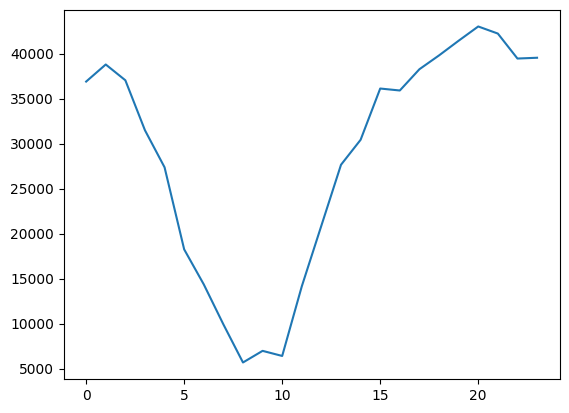

In [8]:
users_by_hour = df.groupby('Time')['user_id_hash'].count()
plt.plot(users_by_hour)

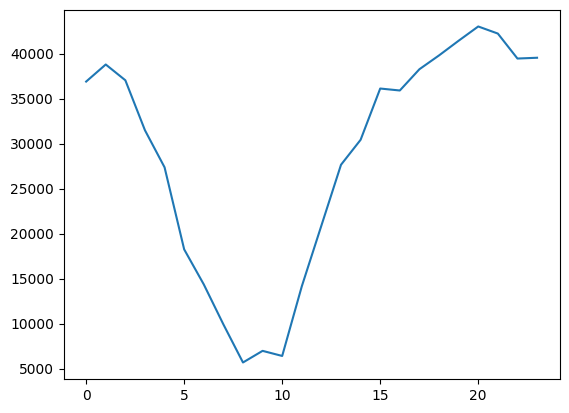

In [9]:
tracing_by_hour = df.groupby('Time')['tracing_id'].count()
plt.plot(users_by_hour)

In [11]:
users_by_trace = df.groupby('user_id_hash')['tracing_id'].count().nlargest(10)
users_by_trace

user_id_hash
5b290a622798442fc4fb02ce6ecd57a90f6328e0    277
962df579427c8dfd1030b2222e8c035fbc22ae39    277
ae65940df67baa0e63a104b1f650a66fcc168407    273
dc6dabca74299cb59a47803fb56948e7988a03e3    273
9d49af693facfb432e6dda10c5323fe3004dab14    264
4b0c949fd9d4ea49ee691b402f5fddbe131e7395    263
e5d4a0cedcd9b308b834988a4a02d2b7b4a5e532    259
984fee4d0ed3ce54ecfa73efb65821aa4c6abe81    256
36efb2e292493bd6cc21b3142aa90a4366207bcd    254
4bfc910c96f2fdbe95d1cb97be6f63e2ea3f6c4a    250
Name: tracing_id, dtype: int64

In [12]:
users_by_trace.describe()

count     10.000000
mean     264.600000
std        9.901739
min      250.000000
25%      256.750000
50%      263.500000
75%      273.000000
max      277.000000
Name: tracing_id, dtype: float64

Here we are checking the relationship between our engagement signals and the hour of the day. This can help us understand when do users mostly engage with the content on the website

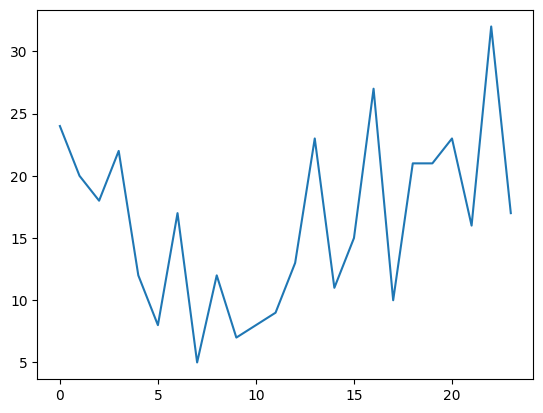

In [15]:
fav_by_hour = df.groupby('Time')['fav'].sum()
plt.plot(fav_by_hour)

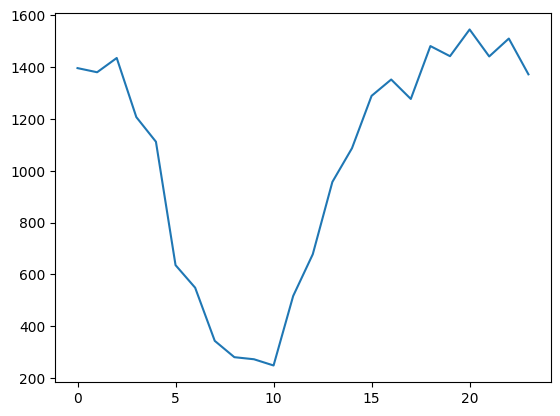

In [16]:
clicks_by_hour = df.groupby('Time')['click'].sum()
plt.plot(clicks_by_hour)

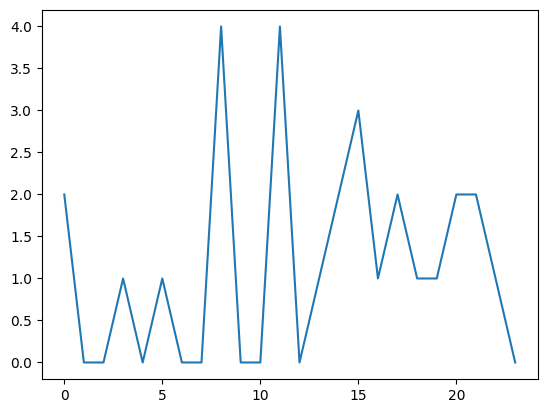

In [17]:
submits = df.groupby('Time')['submit'].sum()
plt.plot(submits)

Now we are trying to understand the distribution of each of these engagement signals with respect to the hour of the day

In [25]:
distribution_fav  = df['Time'][df['fav']==1].value_counts(normalize=True)
distribution_fav

22    0.081841
16    0.069054
0     0.061381
20    0.058824
13    0.058824
3     0.056266
19    0.053708
18    0.053708
1     0.051151
2     0.046036
23    0.043478
6     0.043478
21    0.040921
15    0.038363
12    0.033248
4     0.030691
8     0.030691
14    0.028133
17    0.025575
11    0.023018
5     0.020460
10    0.020460
9     0.017903
7     0.012788
Name: Time, dtype: float64

In [89]:
distribution_click = df['Time'][df['click']==1].value_counts(normalize=True)
distribution_click

20    0.062273
22    0.060863
18    0.059694
19    0.058122
21    0.058081
2     0.057840
0     0.056268
1     0.055623
23    0.055300
16    0.054494
15    0.051955
17    0.051471
3     0.048650
4     0.044821
14    0.043813
13    0.038573
12    0.027328
5     0.025635
6     0.022128
11    0.020838
7     0.013865
8     0.011326
9     0.011004
10    0.010036
Name: Time, dtype: float64

In [82]:
distribution_submit= df[df['submit']==1]["Time"].value_counts(normalize=True)
distribution_submit

8     0.142857
11    0.142857
15    0.107143
14    0.071429
0     0.071429
21    0.071429
17    0.071429
20    0.071429
18    0.035714
5     0.035714
3     0.035714
19    0.035714
13    0.035714
16    0.035714
22    0.035714
Name: Time, dtype: float64

In [86]:
clicks = df.loc[df['click'] == 1]
favs = df.loc[df['fav'] == 1]
submits = df.loc[df['submit'] == 1]

<AxesSubplot: ylabel='Density'>

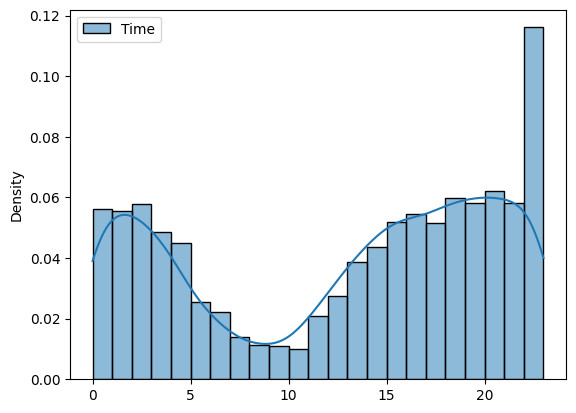

In [88]:
sns.histplot(clicks[['Time']], kde=True, stat="density")

<AxesSubplot: ylabel='Density'>

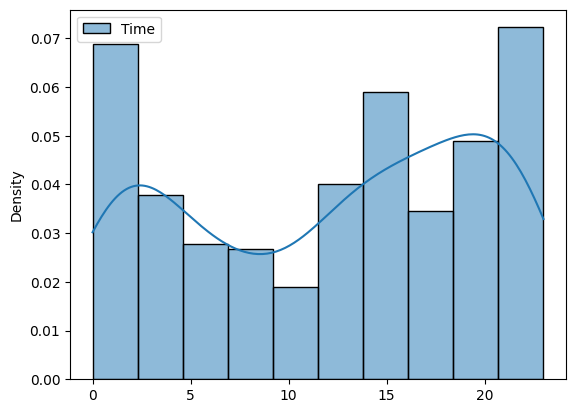

In [90]:
sns.histplot(favs[['Time']], kde=True, stat="density")

<AxesSubplot: ylabel='Density'>

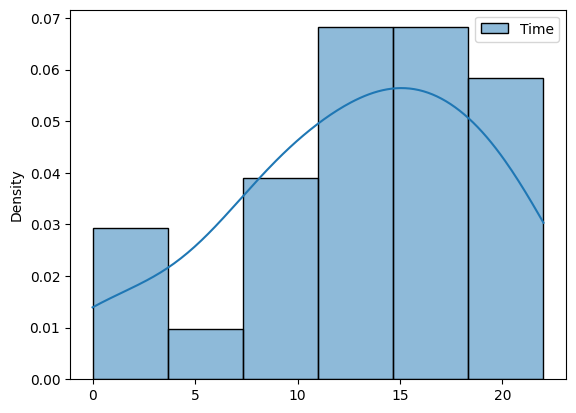

In [91]:
sns.histplot(submits[['Time']], kde=True, stat="density")

We are performing RFM analysis using clicks as an indication of the business value (M)

In [190]:
RFM= df.groupby('zpid').agg(Recency=('Time',lambda x: x.min()),
                                 Frequency=('zpid',lambda x: x.count()),
                                 Monetary=('click',lambda x: x.sum()))
RFM.head()

,Recency,Frequency,Monetary
zpid,,,
000003c589a108a66740947136a79616b34e5731,22,1,0
000004c544be6da6b37af0111f378b234f6e5158,4,2,0
000016f2dce543454fec4419d7db632ce1829ba3,4,2,0
000025f7e32a2f52a5c05a77e80efba53c62334d,0,6,0
000075a536cce86efa1fc1cd4fea85bc76a7437e,20,1,0


In [194]:
RFM['Frequency'].describe()

count    417060.000000
mean          1.634976
std           1.201721
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max          25.000000
Name: Frequency, dtype: float64

In [195]:
quartiles=RFM.quantile(q=[0.25,0.5,0.75]).to_dict()
quartiles

{'Recency': {0.25: 3.0, 0.5: 12.0, 0.75: 18.0},
 'Frequency': {0.25: 1.0, 0.5: 1.0, 0.75: 2.0},
 'Monetary': {0.25: 0.0, 0.5: 0.0, 0.75: 0.0}}

In [196]:
def R(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4

def FM(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1 

In [198]:
RFM['R_Quartile'] = RFM['Recency'].apply(R, args=('Recency',quartiles,))
RFM['F_Quartile'] = RFM['Frequency'].apply(FM, args=('Frequency',quartiles,))
RFM['M_Quartile'] = RFM['Monetary'].apply(FM, args=('Monetary',quartiles,))
RFM['RFM_segmentation'] = RFM.R_Quartile.map(str) \
                    + RFM.F_Quartile.map(str) \
                    + RFM.M_Quartile.map(str)
RFM['RFM_score'] = RFM.R_Quartile.map(int) \
                    + RFM.F_Quartile.map(int) \
                    + RFM.M_Quartile.map(int)
RFM.head()

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFM_segmentation,RFM_score
zpid,,,,,,,,
000003c589a108a66740947136a79616b34e5731,22,1,0,4,4,4,444,12
000004c544be6da6b37af0111f378b234f6e5158,4,2,0,2,2,4,224,8
000016f2dce543454fec4419d7db632ce1829ba3,4,2,0,2,2,4,224,8
000025f7e32a2f52a5c05a77e80efba53c62334d,0,6,0,1,1,4,114,6
000075a536cce86efa1fc1cd4fea85bc76a7437e,20,1,0,4,4,4,444,12


In [199]:
def RFM_label(data):
    if data['RFM_score'] >= 10:
        return 'Lost'
    elif ((data['RFM_score'] >= 9) and (data['RFM_score'] < 10)):
        return 'Hibernating'
    elif ((data['RFM_score'] >= 8) and (data['RFM_score'] < 9)):
        return 'Can’t Lose Them'
    elif ((data['RFM_score'] >= 7) and (data['RFM_score'] < 8)):
        return 'About To Sleep'
    elif ((data['RFM_score'] >= 6) and (data['RFM_score'] < 7)):
        return 'Promising'
    elif ((data['RFM_score'] >= 5) and (data['RFM_score'] < 6)):
        return 'Potential Loyalist'
    elif ((data['RFM_score'] >= 4) and (data['RFM_score'] < 5)):
        return 'Loyal Customers'
    else:
        return 'Champions'
#Create RFM label for customer
RFM['RFM_label'] = RFM.apply(RFM_label, axis=1)
RFM.head()

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFM_segmentation,RFM_score,RFM_label
zpid,,,,,,,,,
000003c589a108a66740947136a79616b34e5731,22,1,0,4,4,4,444,12,Lost
000004c544be6da6b37af0111f378b234f6e5158,4,2,0,2,2,4,224,8,Can’t Lose Them
000016f2dce543454fec4419d7db632ce1829ba3,4,2,0,2,2,4,224,8,Can’t Lose Them
000025f7e32a2f52a5c05a77e80efba53c62334d,0,6,0,1,1,4,114,6,Promising
000075a536cce86efa1fc1cd4fea85bc76a7437e,20,1,0,4,4,4,444,12,Lost


In [200]:
RFM_desc = RFM.groupby('RFM_label').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean', 'count']
}).round(1)
print(RFM_desc)

                   Recency Frequency Monetary        
                      mean      mean     mean   count
RFM_label                                            
About To Sleep         3.4       2.4      0.0   46904
Can’t Lose Them       10.0       2.3      0.1   31512
Champions              1.1       5.3      1.2    5452
Hibernating            6.4       1.3      0.0   81238
Lost                  16.1       1.0      0.0  212238
Loyal Customers        4.0       3.2      1.1    4378
Potential Loyalist    10.6       2.6      1.1    2627
Promising              2.1       3.7      0.1   32711


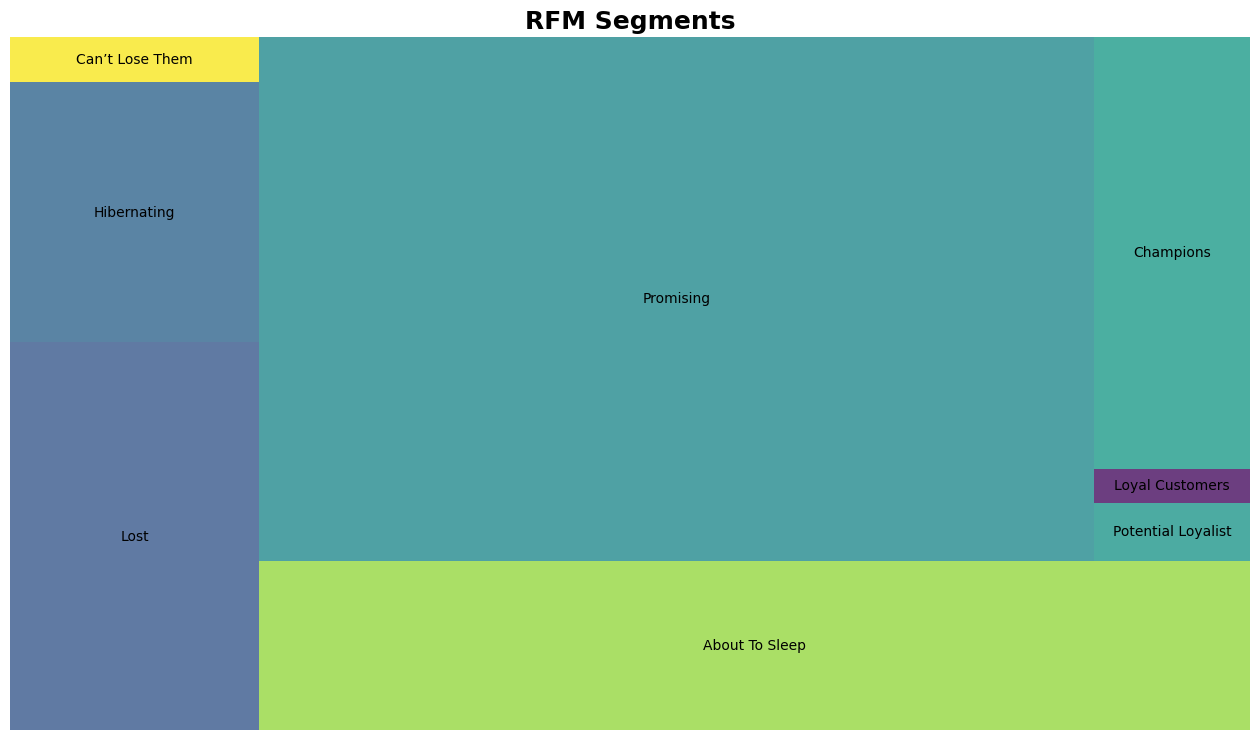

In [201]:
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 9)
RFM_desc.columns = ['RecencyMean','FrequencyMean','MonetaryMean', 'Count']
squarify.plot(sizes=RFM_desc['Count'], 
              label=['Lost',
                     'Hibernating',
                     'Can’t Lose Them',
                     'About To Sleep',
                     'Promising', 
                     'Potential Loyalist', 
                     'Loyal Customers',
                     'Champions'], alpha=.8 )
plt.title("RFM Segments",fontsize=18,fontweight="bold")
plt.axis('off')
plt.show()

Another approach that we are trying for the RFM segmentation is to take a weighted score of the normalised frequencies of all the engagement signals

In [202]:
total_clicks = df[df["click"]==1]["click"].count()
total_favs = df[df["fav"]==1]["fav"].count()
total_submits = df[df["submit"]==1]["submit"].count()

In [203]:
df["weighted_score"] = 1 - (df["click"]  + 1)/total_clicks + 1 - (df["fav"]  + 1)/total_clicks+ 1 - (df["submit"]  + 1)/total_clicks

In [204]:
RFM_weighted= df.groupby('user_id_hash').agg(Recency=('Time',lambda x: x.min()),
                                 Frequency=('user_id_hash',lambda x: x.count()),
                                 Monetary=('weighted_score',lambda x: x.sum()))
RFM_weighted.head()

,Recency,Frequency,Monetary
user_id_hash,,,
0007ab33db57473ef415936ecdd465f12cc7ba96,4,78,233.990367
0008c0db50d29ee13e41c17e3ad367724fa29560,19,45,134.994317
000a9e393432b442d6f2d2db15f46c4fc9af575d,0,113,338.986296
000f5bcec31b791f88c9f3277ae87b89bccdd8a2,2,122,365.985046
00104cad780d4a8c33127f5be5c6c9a56985fab7,16,40,119.995083


In [205]:
RFM_weighted['Frequency'].describe()

count    9890.000000
mean       68.946714
std        45.225667
min         1.000000
25%        34.000000
50%        56.500000
75%       116.000000
max       277.000000
Name: Frequency, dtype: float64

In [207]:
quartiles=RFM_weighted.quantile(q=[0.25,0.5,0.75]).to_dict()
quartiles

{'Recency': {0.25: 4.0, 0.5: 15.0, 0.75: 19.0},
 'Frequency': {0.25: 34.0, 0.5: 56.5, 0.75: 116.0},
 'Monetary': {0.25: 101.99580814187829,
  0.5: 169.49290608625557,
  0.75: 347.98589278516727}}

In [208]:
RFM_weighted['R_Quartile'] = RFM_weighted['Recency'].apply(R, args=('Recency',quartiles,))
RFM_weighted['F_Quartile'] = RFM_weighted['Frequency'].apply(FM, args=('Frequency',quartiles,))
RFM_weighted['M_Quartile'] = RFM_weighted['Monetary'].apply(FM, args=('Monetary',quartiles,))
RFM_weighted['RFM_segmentation'] = RFM_weighted.R_Quartile.map(str) \
                    + RFM_weighted.F_Quartile.map(str) \
                    + RFM_weighted.M_Quartile.map(str)
RFM_weighted['RFM_score'] = RFM_weighted.R_Quartile.map(int) \
                    + RFM_weighted.F_Quartile.map(int) \
                    + RFM_weighted.M_Quartile.map(int)
RFM_weighted.head()

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFM_segmentation,RFM_score
user_id_hash,,,,,,,,
0007ab33db57473ef415936ecdd465f12cc7ba96,4,78,233.990367,1,2,2,122,5
0008c0db50d29ee13e41c17e3ad367724fa29560,19,45,134.994317,3,3,3,333,9
000a9e393432b442d6f2d2db15f46c4fc9af575d,0,113,338.986296,1,2,2,122,5
000f5bcec31b791f88c9f3277ae87b89bccdd8a2,2,122,365.985046,1,1,1,111,3
00104cad780d4a8c33127f5be5c6c9a56985fab7,16,40,119.995083,3,3,3,333,9


In [209]:
RFM_weighted['RFM_label'] = RFM_weighted.apply(RFM_label, axis=1)
RFM_weighted.head()

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFM_segmentation,RFM_score,RFM_label
user_id_hash,,,,,,,,,
0007ab33db57473ef415936ecdd465f12cc7ba96,4,78,233.990367,1,2,2,122,5,Potential Loyalist
0008c0db50d29ee13e41c17e3ad367724fa29560,19,45,134.994317,3,3,3,333,9,Hibernating
000a9e393432b442d6f2d2db15f46c4fc9af575d,0,113,338.986296,1,2,2,122,5,Potential Loyalist
000f5bcec31b791f88c9f3277ae87b89bccdd8a2,2,122,365.985046,1,1,1,111,3,Champions
00104cad780d4a8c33127f5be5c6c9a56985fab7,16,40,119.995083,3,3,3,333,9,Hibernating


In [210]:
RFM_desc = RFM_weighted.groupby('RFM_label').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean', 'count']
}).round(1)
print(RFM_desc)

                   Recency Frequency Monetary      
                      mean      mean     mean count
RFM_label                                          
About To Sleep         9.8      66.5    199.4  1184
Can’t Lose Them       16.1      64.5    193.6  1227
Champions              1.9     129.6    388.7   606
Hibernating            9.7      29.7     89.2  1248
Lost                  17.8      22.3     66.9  2467
Loyal Customers       11.2     129.9    389.8   737
Potential Loyalist     8.6     105.7    317.2  1178
Promising             16.2     107.0    321.1  1243


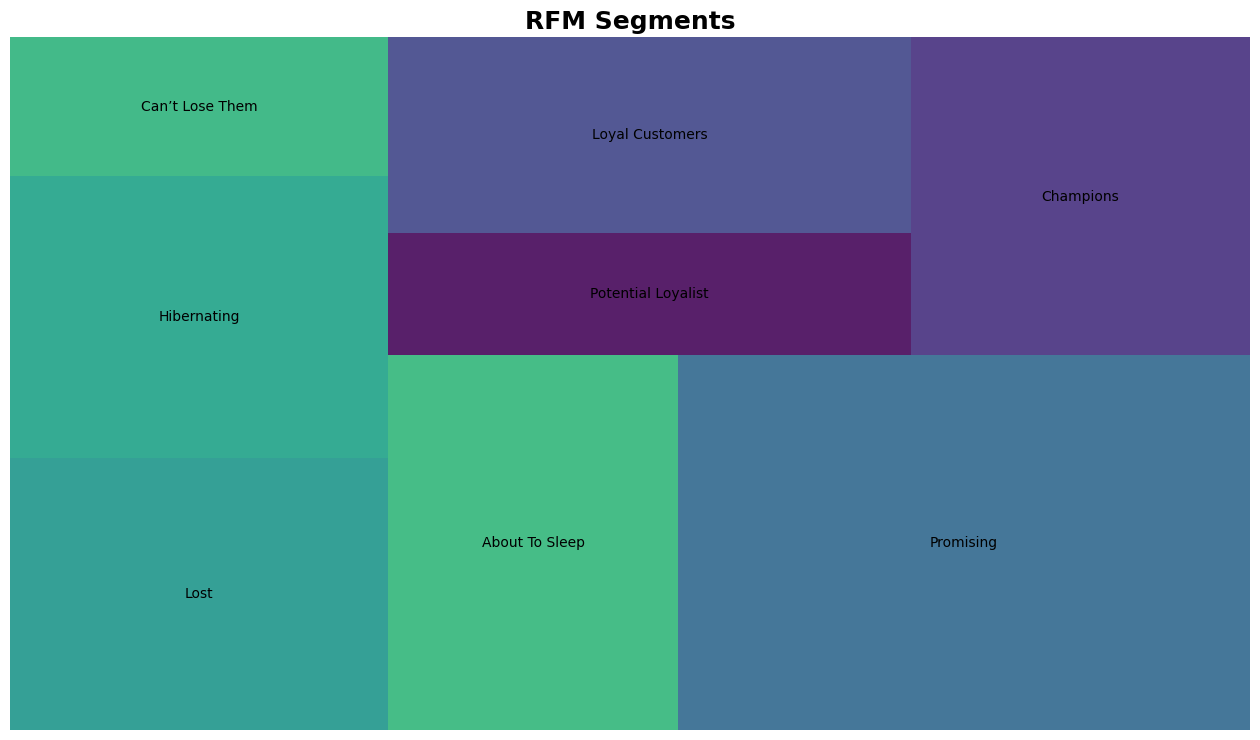

In [214]:
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 9)
RFM_desc.columns = ['RecencyMean','FrequencyMean','MonetaryMean', 'Count']
squarify.plot(sizes=RFM_desc['Count'], 
              label=['Lost',
                     'Hibernating',
                     'Can’t Lose Them',
                     'About To Sleep',
                     'Promising', 
                     'Potential Loyalist', 
                     'Loyal Customers',
                     'Champions'], alpha=.9 )
plt.title("RFM Segments",fontsize=18,fontweight="bold")
plt.axis('off')
plt.show()